2.1. Carga el archivo retail_sales.csv en un DataFrame de Pandas.

In [15]:
import pandas as pd

df = pd.read_csv('../data/retail_sales.csv')

2.2. Muestra las primeras 10 filas del DataFrame para confirmar que los datos se han cargado correctamente.

In [16]:
print(df.head(10))

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   
5               6  2023-04-25     CUST006  Female   45           Beauty   
6               7  2023-03-13     CUST007    Male   46         Clothing   
7               8  2023-02-22     CUST008    Male   30      Electronics   
8               9  2023-12-13     CUST009    Male   63      Electronics   
9              10  2023-10-07     CUST010  Female   52         Clothing   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30 

3.1. Muestra las últimas 5 filas del DataFrame.

In [17]:
print(df.tail(5))

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
995         1              50            50  
996         3              30            90  
997         4              25           100  
998         3              50           150  
999         4              30           120  


3.2. Utiliza el método info() para obtener información general sobre el DataFrame, incluyendo el número de entradas, nombres de las columnas, tipos de datos y memoria utilizada.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


3.3. Genera estadísticas descriptivas del DataFrame utilizando el método describe().

In [19]:
print(df.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


4.1. Inspecciona los tipos de datos de cada columna utilizando el atributo dtypes.



In [20]:
print(df.dtypes)

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [34]:
#convertir columnas a numeros
col_numeric =  ['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount',]

for i in col_numeric:
    df[i] = pd.to_numeric(df[i], errors='coerce')

# convertir a fecha

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


# convertir a categorias

col_categorias = [ 'Customer ID', 'Gender', 'Product Category',]

for i in col_categorias:
    df[i] = df[i].astype('category')  


print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   category      
 3   Gender            1000 non-null   category      
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   category      
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: category(3), datetime64[ns](1), int64(5)
memory usage: 91.3 KB
None


4.2. Cuenta los valores únicos en la columna Producto utilizando el método value_counts().

In [21]:
print(df['Product Category'].value_counts())

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


4.3. Muestra todos los valores únicos en la columna Tienda utilizando el método unique().

In [35]:
print(df['Product Category'].unique())

['Beauty', 'Clothing', 'Electronics']
Categories (3, object): ['Beauty', 'Clothing', 'Electronics']



5.1. Filtra el DataFrame para mostrar solo las filas donde las ventas (Ventas) sean mayores a 50.


In [36]:
ventas_mayores_50 = df[df['Total Amount'] > 50]
print("\nFilas donde Ventas > 50:")
print(ventas_mayores_50)


Filas donde Ventas > 50:
     Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    Male   34           Beauty   
1                 2 2023-02-27     CUST002  Female   26         Clothing   
3                 4 2023-05-21     CUST004    Male   37         Clothing   
4                 5 2023-05-06     CUST005    Male   30           Beauty   
7                 8 2023-02-22     CUST008    Male   30      Electronics   
..              ...        ...         ...     ...  ...              ...   
993             994 2023-12-18     CUST994  Female   51           Beauty   
996             997 2023-11-17     CUST997    Male   52           Beauty   
997             998 2023-10-29     CUST998  Female   23           Beauty   
998             999 2023-12-05     CUST999  Female   36      Electronics   
999            1000 2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3  

5.2. Filtra el DataFrame para mostrar solo las filas donde el precio (Precio) sea menor a 0.5.


In [23]:
precio_menor_05 = df[df['Price per Unit'] < 0.5]
print("\nFilas donde Precio < 0.5:")
print(precio_menor_05)


Filas donde Precio < 0.5:
Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []


5.3. Utilizando el método query(), filtra el DataFrame para mostrar las filas donde el producto sea Manzanas y las ventas sean mayores a 30.


In [5]:
ventas_mayores_30 = df.query("`Product Category` == 'Electronics' and `Total Amount` > 30")
print("\nFilas donde Product Category es 'Electronics' y Total Amount > 30:")
print(ventas_mayores_30)


Filas donde Product Category es 'Electronics' y Total Amount > 30:
     Transaction ID        Date Customer ID  Gender  Age Product Category  \
7                 8  2023-02-22     CUST008    Male   30      Electronics   
8                 9  2023-12-13     CUST009    Male   63      Electronics   
12               13  2023-08-05     CUST013    Male   22      Electronics   
14               15  2023-01-16     CUST015  Female   42      Electronics   
17               18  2023-04-30     CUST018  Female   47      Electronics   
..              ...         ...         ...     ...  ...              ...   
984             985  2023-05-30     CUST985  Female   19      Electronics   
991             992  2023-08-21     CUST992  Female   57      Electronics   
992             993  2023-02-06     CUST993  Female   48      Electronics   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Qu


6.1. Selecciona y muestra solo las columnas Producto y Ventas del DataFrame.


In [37]:
producto_ventas = df[['Product Category', 'Total Amount']]
print("\nColumnas 'Producto' y 'Ventas':")
print(producto_ventas)


Columnas 'Producto' y 'Ventas':
    Product Category  Total Amount
0             Beauty           150
1           Clothing          1000
2        Electronics            30
3           Clothing           500
4             Beauty           100
..               ...           ...
995         Clothing            50
996           Beauty            90
997           Beauty           100
998      Electronics           150
999      Electronics           120

[1000 rows x 2 columns]


6.2. Utilizando loc[], selecciona y muestra las filas de la 5 a la 10 (inclusive) y las columnas Producto y Tienda.


In [38]:
loc_seleccion = df.loc[5:10, ['Product Category', 'Customer ID']]
print("\nFilas de la 5 a la 10 y columnas 'Producto' y '':")
print(loc_seleccion)


Filas de la 5 a la 10 y columnas 'Producto' y '':
   Product Category Customer ID
5            Beauty     CUST006
6          Clothing     CUST007
7       Electronics     CUST008
8       Electronics     CUST009
9          Clothing     CUST010
10         Clothing     CUST011


6.3. Utilizando iloc[], selecciona y muestra las primeras 5 filas y las primeras 3 columnas del DataFrame.

In [39]:
iloc_seleccion = df.iloc[:5, :3]
print("\nPrimeras 5 filas y primeras 3 columnas:")
print(iloc_seleccion)


Primeras 5 filas y primeras 3 columnas:
   Transaction ID       Date Customer ID
0               1 2023-11-24     CUST001
1               2 2023-02-27     CUST002
2               3 2023-01-13     CUST003
3               4 2023-05-21     CUST004
4               5 2023-05-06     CUST005


7.1. Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.

In [40]:
print(df.describe())

       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000000    900.000000  
max 

7.2. Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.

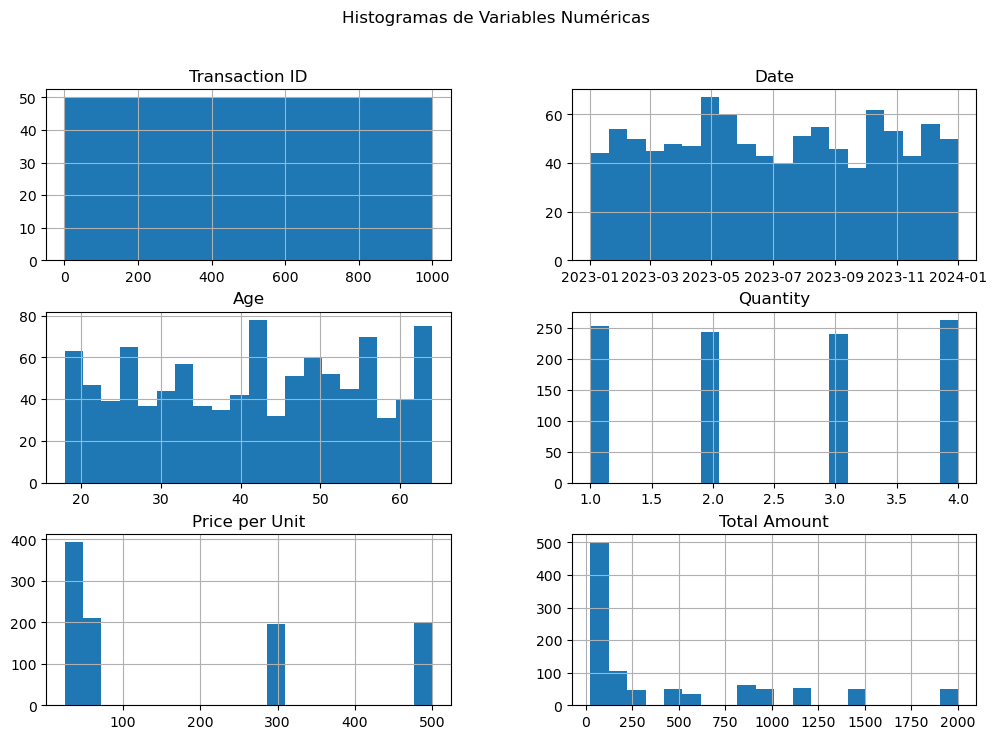

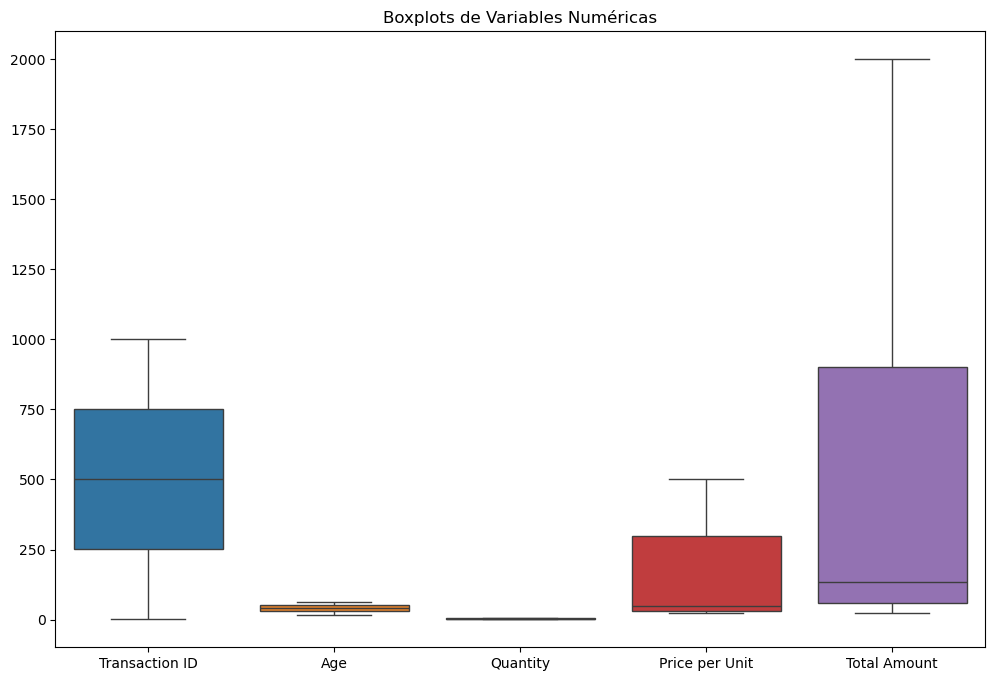

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas
df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplots de Variables Numéricas')
plt.show()


7.3. Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.

In [42]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   category      
 3   Gender            1000 non-null   category      
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   category      
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: category(3), datetime64[ns](1), int64(5)
memory usage: 91.3 KB
None


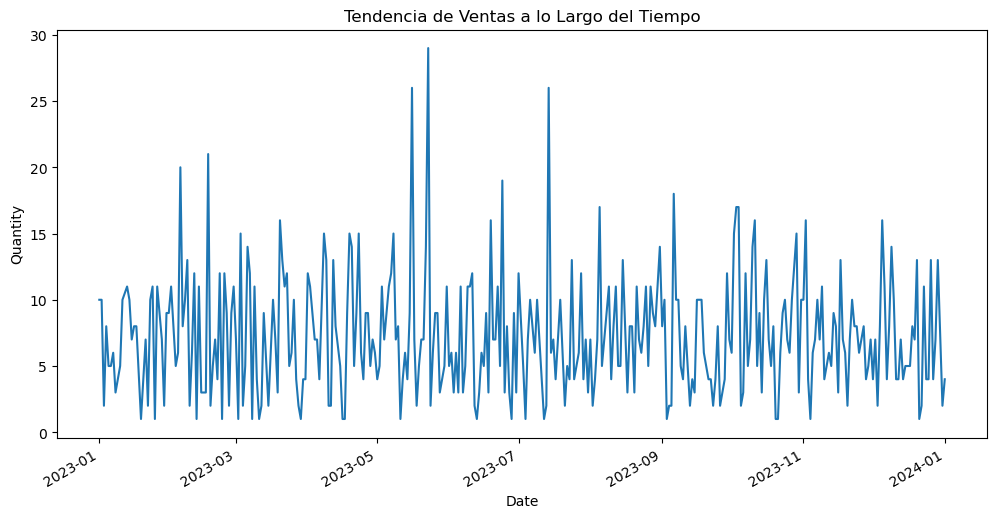

In [44]:

df['Date'] = pd.to_datetime(df['Date'])

# Agrupar por fecha y calcular las ventas diarias 
ventas_por_fecha = df.groupby('Date')['Quantity'].sum()  

# Gráfico de líneas
plt.figure(figsize=(12, 6))
ventas_por_fecha.plot(kind='line')
plt.title('Tendencia de Ventas a lo Largo del Tiempo')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()


7.4. Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.

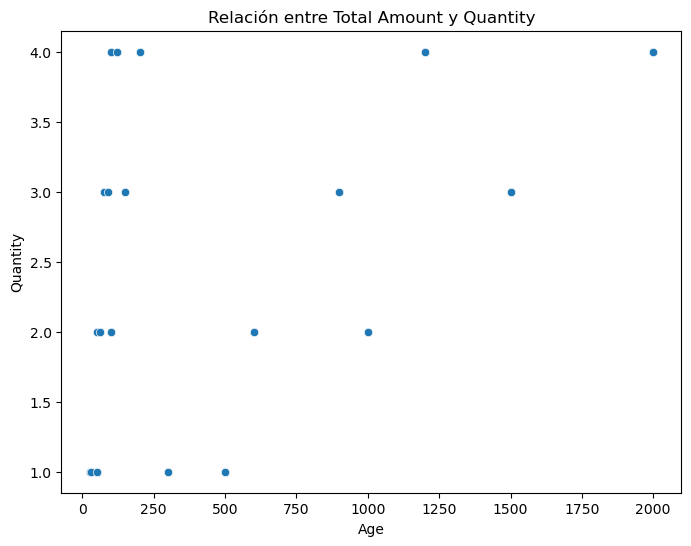

In [53]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Total Amount', y='Quantity')  
plt.title('Relación entre Total Amount y Quantity')
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.show()


7.5. Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

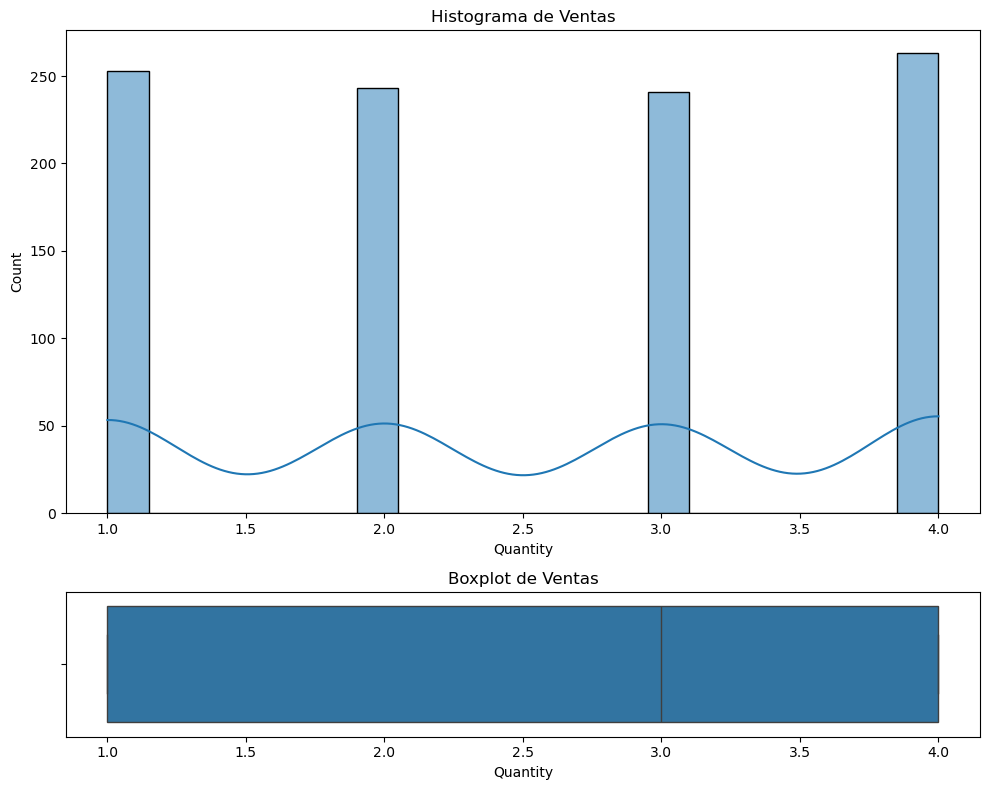

In [46]:
# Crear una figura con subplots para combinar histogramas y boxplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 0.3]})

# Histograma de ventas
sns.histplot(df['Quantity'], bins=20, ax=axs[0], kde=True) 
axs[0].set_title('Histograma de Ventas')

# Boxplot de ventas
sns.boxplot(x=df['Quantity'], ax=axs[1], orient='h')
axs[1].set_title('Boxplot de Ventas')

plt.tight_layout()
plt.show()


8.1. Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.

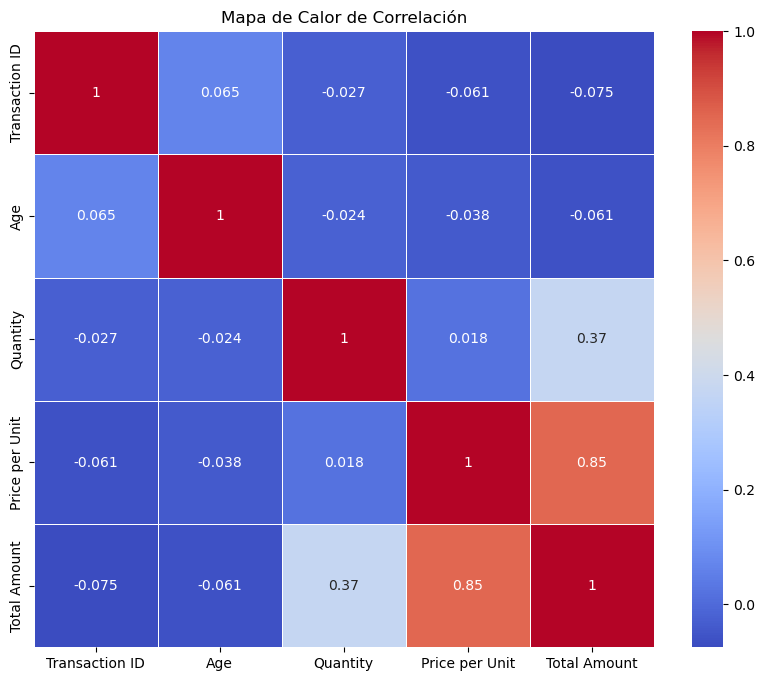

In [48]:
# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()


8.2. Crea subplots para comparar diferentes variables clave.

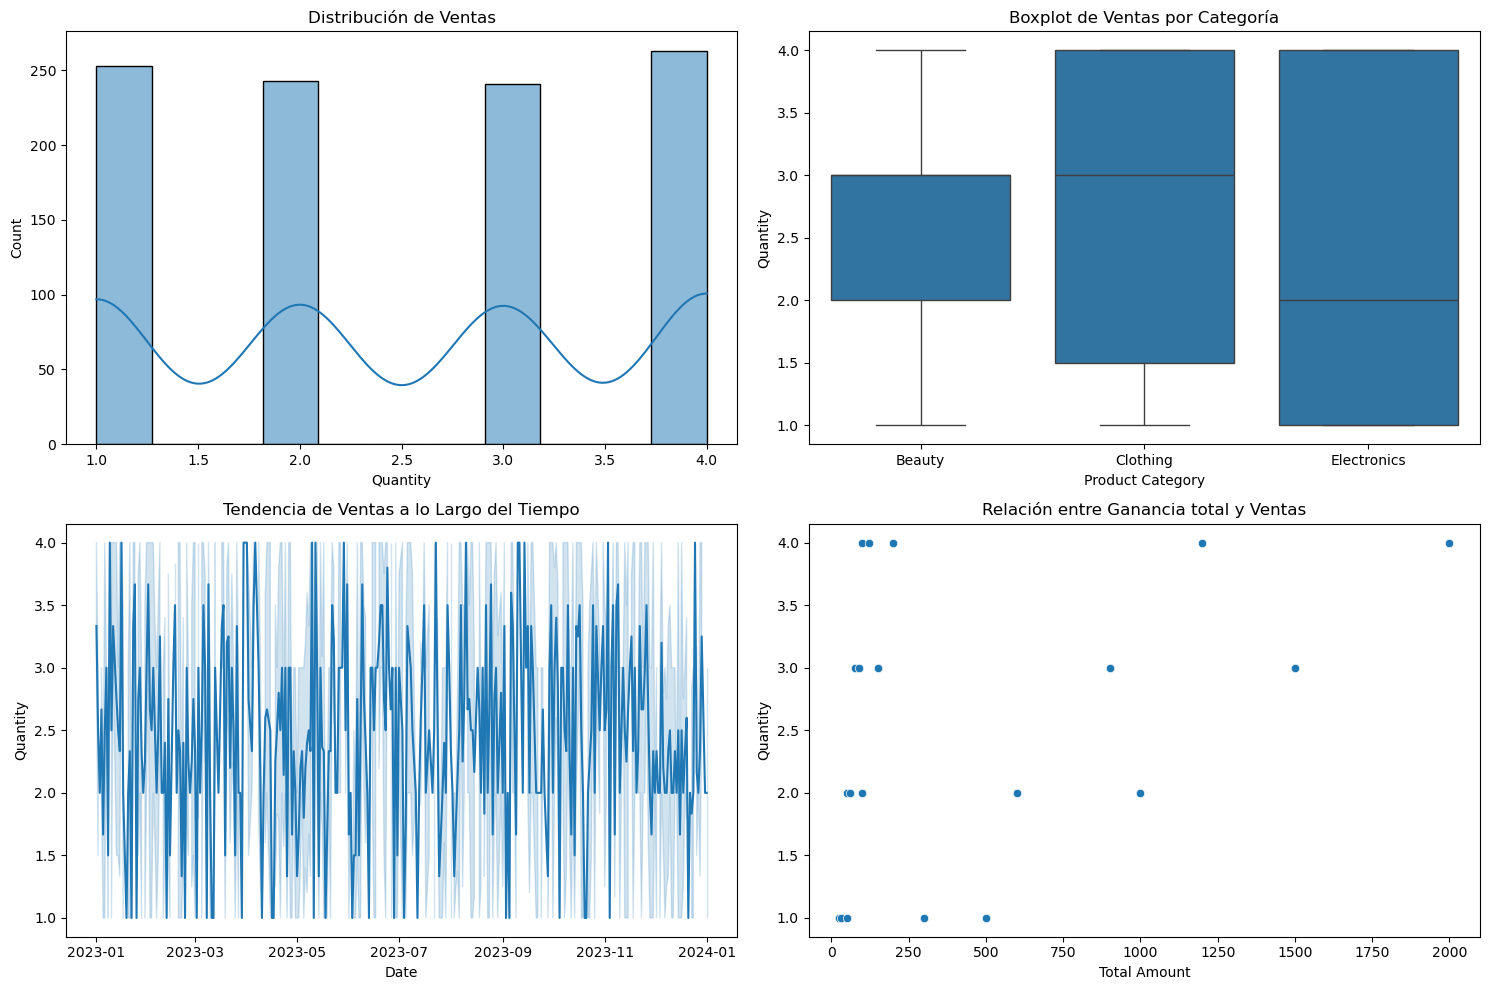

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(df['Quantity'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribución de Ventas')

sns.boxplot(x='Product Category', y='Quantity', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot de Ventas por Categoría')

sns.lineplot(x='Date', y='Quantity', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Tendencia de Ventas a lo Largo del Tiempo')

sns.scatterplot(x='Total Amount', y='Quantity', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Relación entre Ganancia total y Ventas')

plt.tight_layout()
plt.show()


8.3. Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.

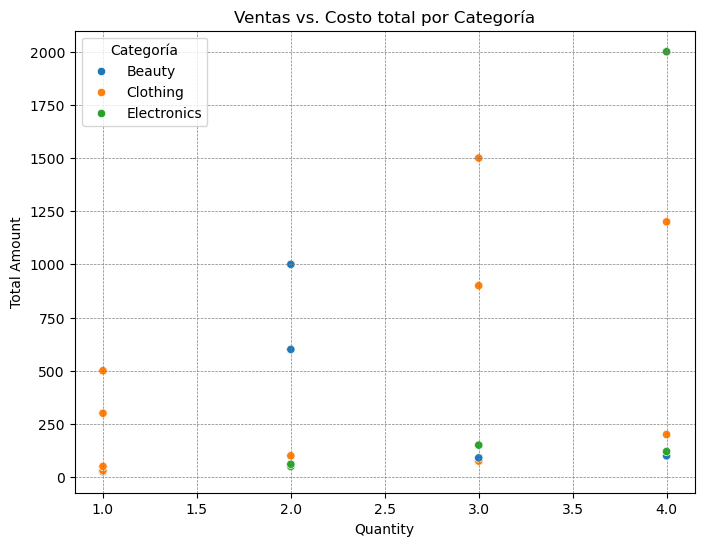

In [51]:
# Ejemplo con cuadrícula y anotación en el gráfico de dispersión
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='Quantity', y='Total Amount', hue='Product Category', ax=ax)
ax.set_title('Ventas vs. Costo total por Categoría')
ax.grid(True, linestyle='--', color='gray', linewidth=0.5)
ax.legend(title='Categoría')

# Anotación de un punto importante y una flecha
ax.annotate('Máyor venta', xy=(df['Total Amount'].max(), df['Total Amount'].max()), 
            xytext=(df['Quantity'].max() - 10, df['Total Amount'].max() + 5),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()
